# **Cat and Dog Classification Using 'ResNet50' Pretrained Model**


In [ ]:
#@title **1. import requirments**

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [ ]:
#@title **2. mount google drive to access files**

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change directory to current folder

%cd /content/drive/MyDrive/DataSets/classification/cat_and_dog

/content/drive/MyDrive/DataSets/classification/cat_and_dog


In [ ]:
# check files present in current directory

!ls

cat-dog-classification.ipynb  cat-dog-dataset


In [ ]:
#@title **3. load the dataset from directory**

data = tf.keras.utils.image_dataset_from_directory(directory='cat-dog-dataset/',
                                                   labels='inferred',
                                                   label_mode='int' ,
                                                   color_mode='rgb' ,
                                                   batch_size=32 ,
                                                   image_size=(224 ,224) ,
                                                   shuffle=True)

Found 2000 files belonging to 2 classes.


In [ ]:
# check the class names

class_names = data.class_names
class_names

['cat', 'dog']

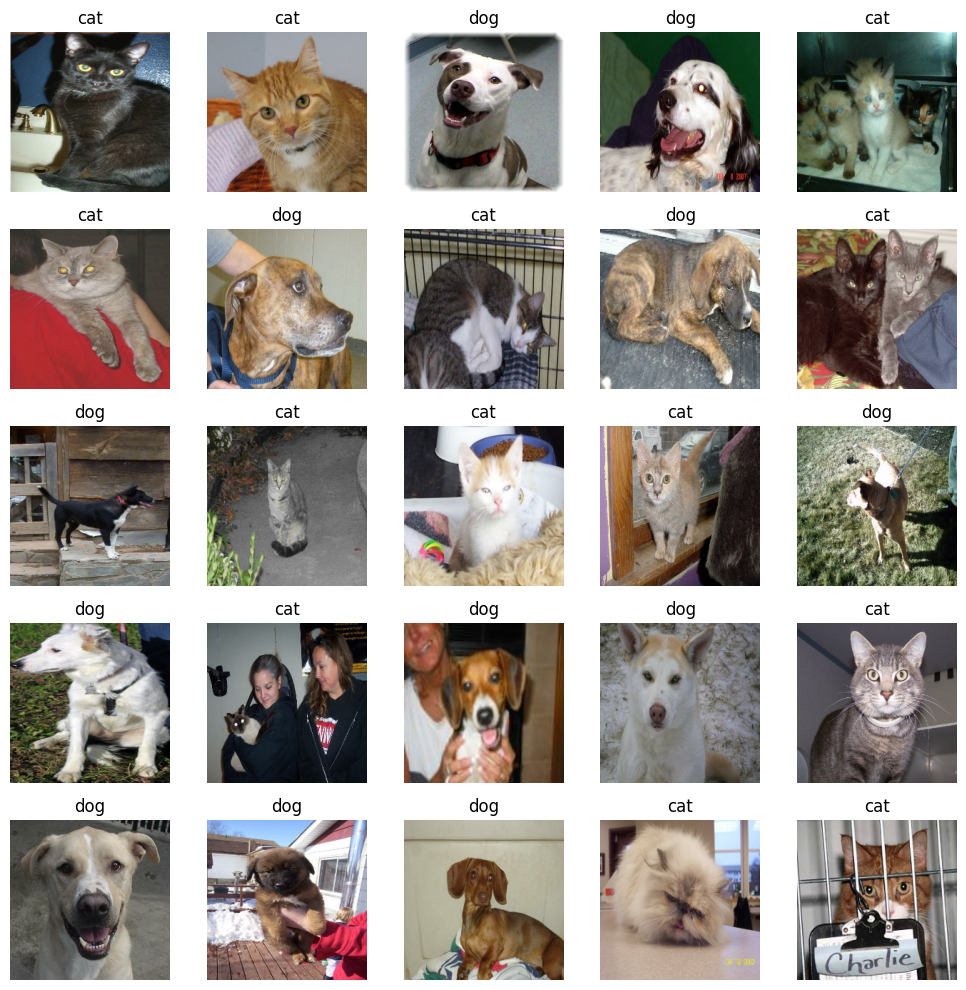

In [ ]:
#@title **4. visualise images**

plt.figure(figsize=(10,10))
for images, labels in data.take(1):
  for i in range(25):
    plt.subplot(5 ,5 ,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
#@title **5. separate images and their corresponding labels**

X = []
y = []
for images ,labels in data:
  X.extend(images)
  y.extend(labels)

In [ ]:
# after appending into list

X[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[246.08705 , 242.08705 , 241.02902 ],
        [242.2567  , 240.17188 , 238.5125  ],
        [238.11198 , 237.11198 , 235.11198 ],
        ...,
        [244.41486 , 238.30998 , 233.4729  ],
        [243.08899 , 238.16556 , 232.13654 ],
        [239.20312 , 234.26115 , 228.23215 ]],

       [[249.08705 , 245.08705 , 242.08705 ],
        [245.479   , 243.22745 , 240.92142 ],
        [241.8114  , 240.654   , 238.70647 ],
        ...,
        [250.96873 , 247.79352 , 242.05579 ],
        [250.7175  , 248.30031 , 241.47441 ],
        [244.6942  , 241.6942  , 234.8683  ]],

       [[249.8549  , 245.8549  , 242.8549  ],
        [248.67076 , 244.67076 , 242.76228 ],
        [246.1287  , 243.1477  , 241.63315 ],
        ...,
        [243.60426 , 240.95209 , 235.8666  ],
        [236.39043 , 233.6806  , 228.8257  ],
        [227.08258 , 224.37277 , 219.51785 ]],

       ...,

       [[ 66.41968 ,  83.41968 , 101.41968 ],
        [ 65.

In [ ]:
#@title **6. convert list into numpy array**

X = np.array(X)
y = np.array(y)

In [ ]:
# after converting into numpy array

X[0]

array([[[246.08705 , 242.08705 , 241.02902 ],
        [242.2567  , 240.17188 , 238.5125  ],
        [238.11198 , 237.11198 , 235.11198 ],
        ...,
        [244.41486 , 238.30998 , 233.4729  ],
        [243.08899 , 238.16556 , 232.13654 ],
        [239.20312 , 234.26115 , 228.23215 ]],

       [[249.08705 , 245.08705 , 242.08705 ],
        [245.479   , 243.22745 , 240.92142 ],
        [241.8114  , 240.654   , 238.70647 ],
        ...,
        [250.96873 , 247.79352 , 242.05579 ],
        [250.7175  , 248.30031 , 241.47441 ],
        [244.6942  , 241.6942  , 234.8683  ]],

       [[249.8549  , 245.8549  , 242.8549  ],
        [248.67076 , 244.67076 , 242.76228 ],
        [246.1287  , 243.1477  , 241.63315 ],
        ...,
        [243.60426 , 240.95209 , 235.8666  ],
        [236.39043 , 233.6806  , 228.8257  ],
        [227.08258 , 224.37277 , 219.51785 ]],

       ...,

       [[ 66.41968 ,  83.41968 , 101.41968 ],
        [ 65.14289 ,  82.328125, 100.23551 ],
        [ 62.54836 ,  

In [ ]:
#@title **7. normalise the images pixel values by dividing with 255**

X = X / 255

In [ ]:
# after Normalising the pixel values

X[0]

array([[[0.96504724, 0.94936097, 0.9452118 ],
        [0.9500263 , 0.9418505 , 0.93534315],
        [0.9337725 , 0.92985094, 0.9220078 ],
        ...,
        [0.95848966, 0.934549  , 0.91558   ],
        [0.95329016, 0.93398255, 0.91033936],
        [0.93805146, 0.9186712 , 0.89502805]],

       [[0.97681195, 0.9611257 , 0.94936097],
        [0.96266276, 0.9538331 , 0.9447899 ],
        [0.94828   , 0.9437412 , 0.93610376],
        ...,
        [0.9841911 , 0.9717393 , 0.94923836],
        [0.98320585, 0.9737267 , 0.9469585 ],
        [0.9595851 , 0.94782037, 0.92105216]],

       [[0.9798232 , 0.9641369 , 0.9523722 ],
        [0.97517943, 0.95949316, 0.95200896],
        [0.96521056, 0.9535204 , 0.947581  ],
        ...,
        [0.9553108 , 0.94491017, 0.92496705],
        [0.92702127, 0.91639453, 0.8973557 ],
        [0.8905199 , 0.87989324, 0.8608543 ]],

       ...,

       [[0.26046932, 0.32713598, 0.39772424],
        [0.25546232, 0.32285538, 0.39308044],
        [0.24528769, 0

In [ ]:
#@title **8. one hot encoding to the categorical values**

from keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y[0]

array([0., 1.], dtype=float32)

In [ ]:
#@title **10. split the data into train and test**

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X , y ,test_size=0.25 ,random_state=21)

In [ ]:
X_train.shape , y_train.shape ,X_test.shape , y_test.shape

((1500, 224, 224, 3), (1500, 2), (500, 224, 224, 3), (500, 2))

In [ ]:
#@title **11. import pretrainen model from keras application**

from keras.applications import ResNet50
base_model = ResNet50(include_top=False ,
                      weights="imagenet" ,
                      input_shape=(224,224,3) ,
                      pooling='max')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# freeze the base_model from training

base_model.trainable=False

In [ ]:
#@title **12. create a sequential layer by adding this base_model**

from keras.models import Sequential
from keras.layers import Dropout ,Flatten ,Dense

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(units=300 ,activation='relu' ,kernel_initializer='he_uniform'))
model.add(Dense(units=100 ,activation='relu' ,kernel_initializer='he_uniform'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=2 ,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 300)               614700    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 24232714 (92.44 MB)
Trainable params: 6450

In [ ]:
#@title **13. compile the model**

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003) ,
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
# import callback

from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5' ,
                                save_best_only=True ,
                                verbose=1 ,
                                mode='auto' ,
                                monitor='val_accuracy')

In [ ]:
#@title **14. Train the model**

history = model.fit(x=X_train ,
                    y=y_train ,
                    batch_size=32 ,
                    callbacks=[check_pointer] ,
                    verbose=1 ,
                    shuffle=True ,
                    validation_data =(X_test,y_test) ,
                    epochs=55)

Epoch 1/55
47/47 [==============================] - ETA: 0s - loss: 0.7736 - accuracy: 0.5467
Epoch 1: val_accuracy improved from -inf to 0.59400, saving model to model.weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 21s 275ms/step - loss: 0.7736 - accuracy: 0.5467 - val_loss: 0.6583 - val_accuracy: 0.5940
Epoch 2/55
47/47 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5507
Epoch 2: val_accuracy improved from 0.59400 to 0.61400, saving model to model.weights.best.hdf5
47/47 [==============================] - 8s 168ms/step - loss: 0.6870 - accuracy: 0.5507 - val_loss: 0.6500 - val_accuracy: 0.6140
Epoch 3/55
47/47 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.5860
Epoch 3: val_accuracy improved from 0.61400 to 0.62800, saving model to model.weights.best.hdf5
47/47 [==============================] - 7s 144ms/step - loss: 0.6728 - accuracy: 0.5860 - val_loss: 0.6538 - val_accuracy: 0.6280
Epoch 4/55
47/47 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.6007
Epoch 4: val_accuracy did not improve from 0.62800
47/47 [==============================] - 6s 127ms/step - loss: 0.6694 - accuracy:

In [ ]:
# load model weights with best validation accuracy

model.load_weights('model.weights.best.hdf5')

In [ ]:
#@title **15. make Prediction**

y_hat = model.predict(X_test)

16/16 [==============================] - 2s 93ms/step


In [ ]:
# check accuracy

score = model.evaluate(X_test ,y_test)

print(f'Accuracy Score : {score[1]*100}')

16/16 [==============================] - 2s 94ms/step - loss: 0.5929 - accuracy: 0.6860
Accuracy Score : 68.59999895095825


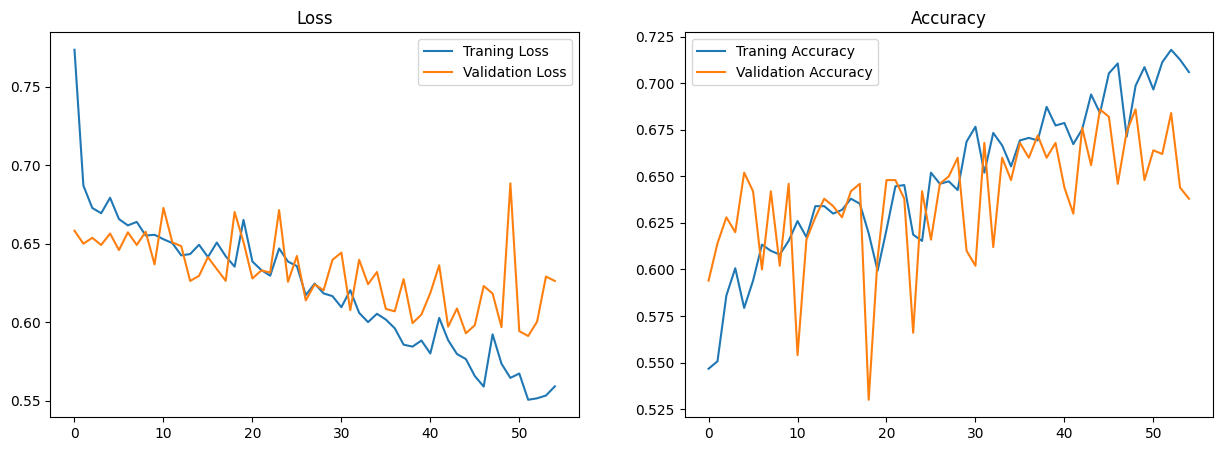

In [ ]:
# creating a training loss and validation loss of graph
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Traning Loss")
plt.plot(history.history['val_loss'] ,label="Validation Loss")
plt.title("Loss")
plt.legend()


# creating a training accuracy and validation accuracy of graph
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="Traning Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

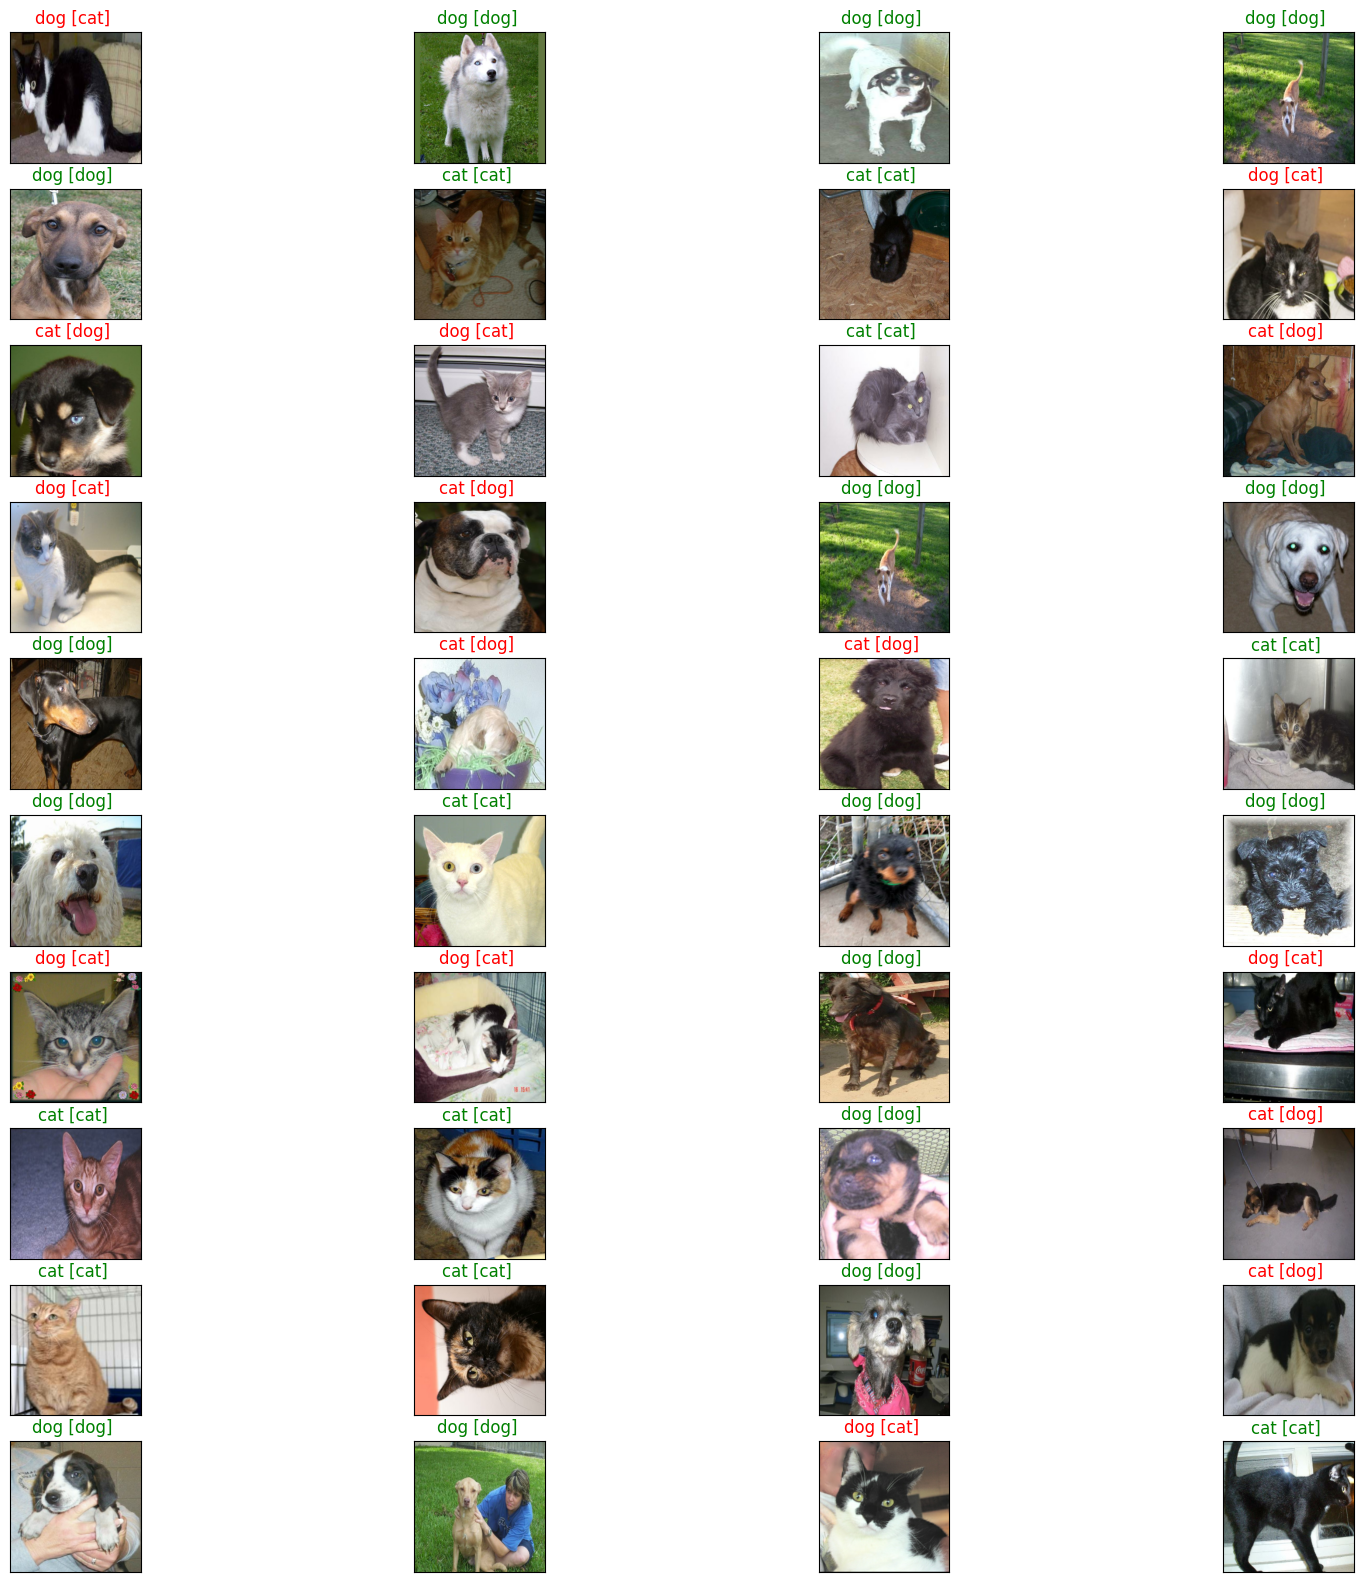

In [ ]:
# visualise random images

fig = plt.figure(figsize=(20,20))
for i ,idx in enumerate(np.random.choice(X_test.shape[0] , size=40 , replace=True)) :
  ax = fig.add_subplot(10 ,4 ,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  act_idx = np.argmax(y_test[idx])
  ax.set_title("{} [{}] ".format(class_names[pred_idx] ,class_names[act_idx]) ,color = "green" if pred_idx==act_idx else "red")

In [ ]:
# Save the model as a pickle file for deploying

import pickle
with open('cat-dog-model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'cat-dog-model.pkl'")

Model saved as 'cat-dog-model.pkl'


        ___________________ END ____________________